In [7]:
%load_ext autoreload
%autoreload 2

# !pip install pykitti torch_geometric torch_sparse torch_scatter
from iosdata.kitti import Kitti
import meshplot
import matplotlib.pyplot as plt
from PyKitti2Dataset import PyKitti2
import numpy as np

basedir = '/home/ios/data3/kitti/tracking/training'
basedir_testing = '/home/ios/data3/kitti/tracking/testing/'
sequence = '0000'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
kitti = PyKitti2(basedir, "0007")  
THE_WORLD, INTENSITIES, BATCH, _, = kitti.build_point_cloud(0, 1)

subsample = 10
THE_WORLD = THE_WORLD[::subsample]
plot = meshplot.plot(THE_WORLD, c=np.arange(len(THE_WORLD)), shading={"point_size": 0.8, "width": 600, "height": 600})

In [2]:
!cat /home/ios/data3/kitti/tracking/training/calib/0001.txt

P0: 7.215377000000e+02 0.000000000000e+00 6.095593000000e+02 0.000000000000e+00 0.000000000000e+00 7.215377000000e+02 1.728540000000e+02 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00  
P1: 7.215377000000e+02 0.000000000000e+00 6.095593000000e+02 -3.875744000000e+02 0.000000000000e+00 7.215377000000e+02 1.728540000000e+02 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00  
P2: 7.215377000000e+02 0.000000000000e+00 6.095593000000e+02 4.485728000000e+01 0.000000000000e+00 7.215377000000e+02 1.728540000000e+02 2.163791000000e-01 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00 2.745884000000e-03  
P3: 7.215377000000e+02 0.000000000000e+00 6.095593000000e+02 -3.395242000000e+02 0.000000000000e+00 7.215377000000e+02 1.728540000000e+02 2.199936000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00 2.729905000000e-03  
R_rect 9.999239000000e-01 9.837760000000e-03 -7.445048000000e-

In [3]:
!ls {basedir}/image_02  

0000  0002  0004  0006	0008  0010  0012  0014	0016  0018  0020
0001  0003  0005  0007	0009  0011  0013  0015	0017  0019


In [168]:
kitti = PyKitti2(basedir, "0007")  

files 800


In [5]:
kitti = PyKitti2(basedir, "0009")  
volumes, pclocs, patches, ilocs, RTs, frame_idx, aff = kitti.compute_matches_cam2(390 , 390 +3, 
                                                                                   max_distance=30, 
                                                                                   min_occurences=1, 
                                                                                   min_points=30,
                                                                                   debug=True)
len(volumes)

files 803


/home/ios/anaconda3/envs/pytorch/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Found 41 matches.
Found 17 keypoints that occur in 1 patches.
Found 17 keypoints without nearby keypoints.
Found 17 matches with minimum 30 points.


17

In [3]:
kitti = PyKitti2(basedir, sequence)
kitti, PyKitti2.SEQUENCES

NameError: name 'PyKitti2' is not defined

In [29]:
velo, cam2, cam3, oxts = kitti[0]
oxts.T_w_imu

array([[ 0.34185175,  0.93951723, -0.02108947,  0.        ],
       [-0.93975389,  0.34176542, -0.0076823 ,  0.        ],
       [-0.00001   ,  0.02244511,  0.99974808,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

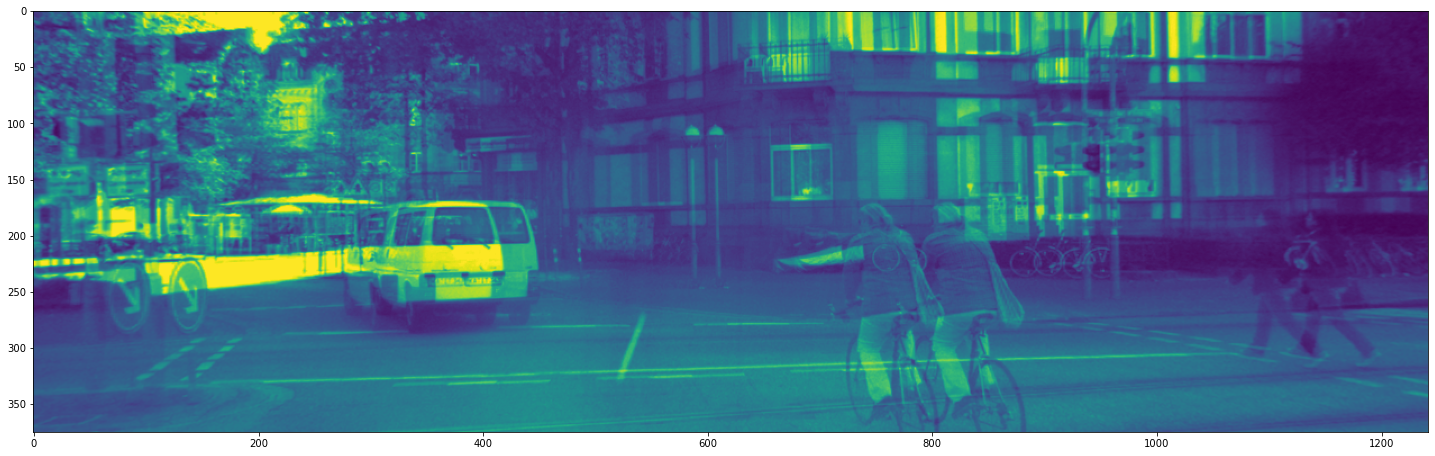

In [6]:
fig, ax = plt.subplots(figsize=(25, 25))
ax.imshow(np.asarray(cam2).mean(2)/2 + np.asarray(cam3).mean(2)/2)

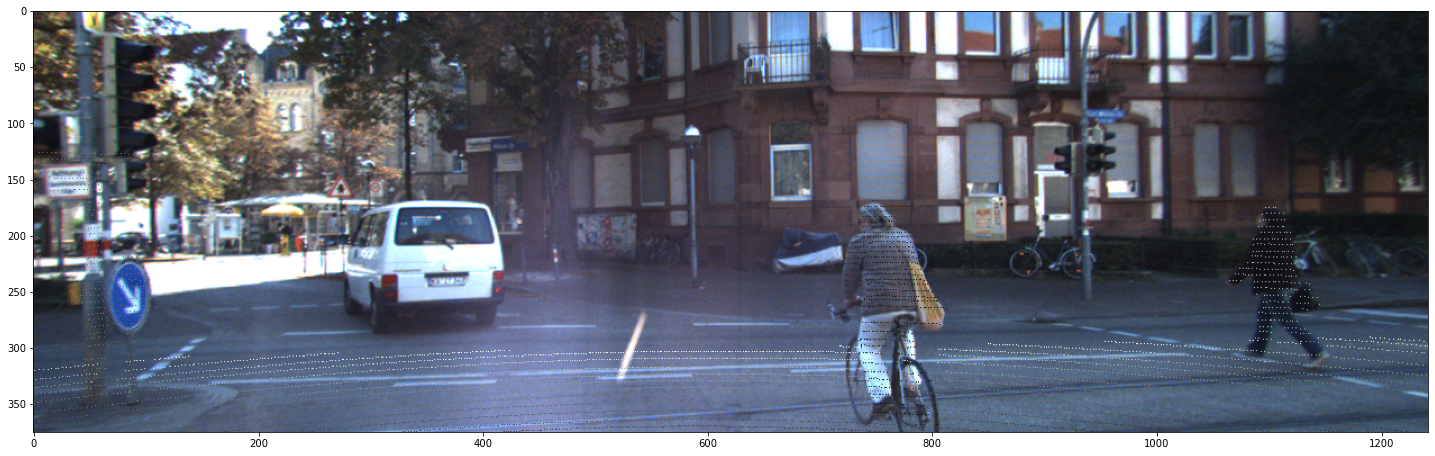

In [7]:
cam3_ = np.asarray(cam3).copy()
x, y, z, i, coo, idx = kitti.veloTocam3(velo)

x = x[z < 10]
y = y[z < 10]
z = z[z < 10]
z = ( z- z.min())/( z.max()-  z.min()) * 255
cam3_[y, x] = np.array([z, z, z]).T

fig, ax = plt.subplots(figsize=(25, 25))
ax.imshow(cam3_)

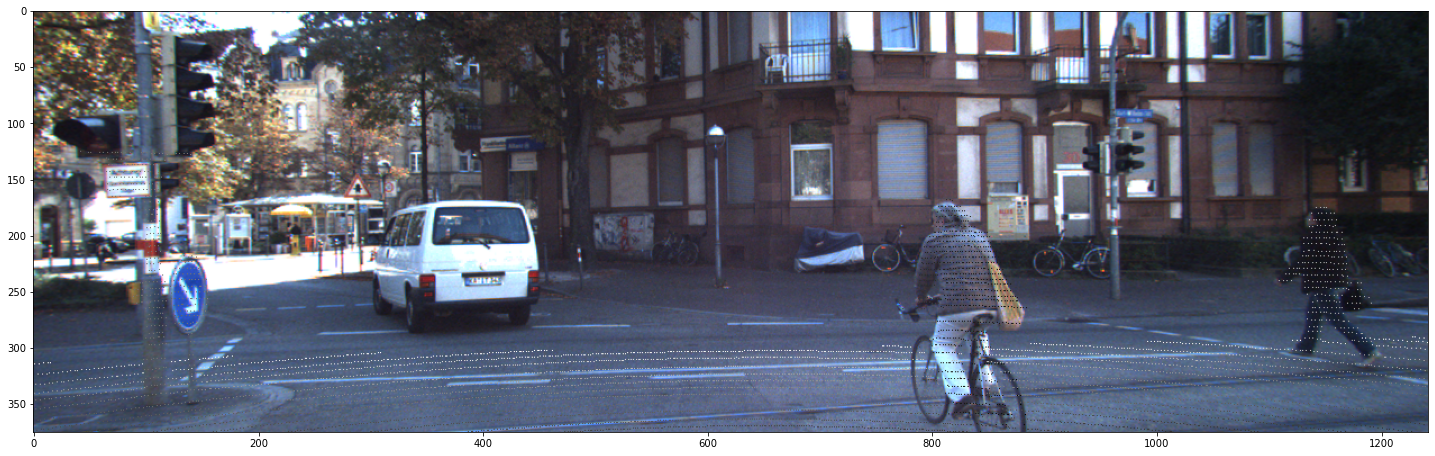

In [8]:
cam2_ = np.asarray(cam2).copy()
x, y, z, i, coo, idx = kitti.veloTocam2(velo)

x = x[z < 10]
y = y[z < 10]
z = z[z < 10]
z = ( z- z.min())/( z.max()-  z.min()) * 255
cam2_[y, x] = np.array([z, z, z]).T

fig, ax = plt.subplots(figsize=(25, 25))
ax.imshow(cam2_)

In [9]:
xyz = np.array([kitti[i][3].T_w_imu[:3, 3] for i in range(154)])

In [10]:
meshplot.plot(xyz, c=np.arange(len(xyz)), shading={"point_size": 5, "width": 300, "height": 300})

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(15.018791…

In [8]:
THE_WORLD, INTENSITIES, BATCH, _, = kitti.build_point_cloud(0, 1)

subsample = 10
THE_WORLD = THE_WORLD[::subsample]
plot = meshplot.plot(THE_WORLD, c=np.arange(len(THE_WORLD)), shading={"point_size": 0.8, "width": 600, "height": 600})

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(2.5117797…

In [17]:
THE_WORLD.min(0), THE_WORLD.max(0)

(array([-70.07154843, -67.09856994, -20.25209588]),
 array([78.82367515, 73.22287105,  4.07425769]))

In [12]:
keypoints = get_iis_keypoints(THE_WORLD, salient_radius=0.7, non_max_radius=1.5)
keypoints.shape

(270, 3)

In [13]:
plot = meshplot.plot(THE_WORLD, c=np.arange(len(THE_WORLD)), shading={"point_size": 0.8, "width": 600, "height": 600})
red = np.array([[1, 0, 0]]).repeat(len(keypoints), 0)
plot.add_points(keypoints,  c=red, shading={"point_size": 2.8, "width": 600, "height": 600});

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0765495…

In [49]:
volumes, pclocs, patches, ilocs, RTs, frame_idx, aff = kitti.compute_matches_cam2(0, 5, 
                                                                       max_distance=40, 
                                                                       min_occurences=3, 
                                                                       min_points=10)
len(volumes)

30

In [50]:
aff

array([[  84,   85, 1211, 1545, 2861, 2899,   90, 1210, 1515, 1516, 2365,
        2891, 2917, 1185, 1190, 1218, 1219, 2367, 2886, 2924,  477,  478,
        3034,  132,  518,  519, 2596, 2606, 3028, 3079],
       [ 262,  262,   23,  238,   22,   10,  262,  191,  238,  238,  147,
          22,   10,  191,  191,   23,   23,  147,   22,   10,   97,   97,
          10,  262,   97,   97,  147,  147,   22,   10]])

(128, 79, 3)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.036562…

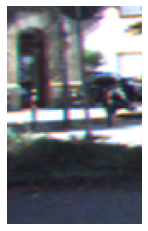

In [51]:
idx = 0
show_pair(volumes, patches, idx)

(128, 79, 3)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.036562…

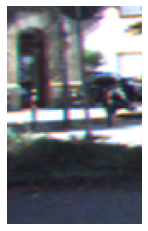

In [52]:
show_pair(volumes, patches, idx+1)

(128, 128, 3)


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.224008…

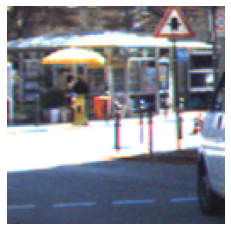

In [53]:
show_pair(volumes, patches, idx+2)

In [52]:
def estimate_pnp(points_in_velo, ilocs, K=kitti.calib.K_cam2, Ref=kitti.calib.T_cam2_velo):
    ret, rvecs, tvecs = cv2.solvePnP(points_in_velo, ilocs.astype(np.float32),K, None)
    return np.linalg.norm(rt_to_se3(rvecs, tvecs) - Ref), rt_to_se3(rvecs, tvecs) 

history = []
stepsize = 3

for f in range(0, 9, stepsize):
    
    volumes, pclocs, patches, ilocs, RTs, frame_idx, aff = kitti.compute_matches_cam2(f, f+stepsize, 
                                                                           max_distance=40, 
                                                                           min_occurences=1, 
                                                                           min_points=10)
    if (frame_idx == f).sum() >= 8:
        points_in_velo = (RTs[0] @ to_homo(pclocs).T).T[: , :3]
        print(points_in_velo.mean(0))
        l2, RT = estimate_pnp(points_in_velo[frame_idx == f], ilocs[frame_idx == f])
        history.append((l2, RT))
        print(history[-1][0])
    else:
        print(f"Too few points, were {(frame_idx == f).sum()}")

    

[27.59060378  4.77201834 -0.93320635]
0.09441109221036124
[30.0589649   4.70664173 -0.99368062]
0.27940046533619894
[28.41140813  3.15840443 -0.49578102]
0.04800539040862464


In [23]:
history

[(0.05597815146486245,
  array([[ 0.0007035 , -0.99995196, -0.00977653,  0.04830783],
         [ 0.0086973 ,  0.00978228, -0.99991433, -0.06343854],
         [ 0.99996193,  0.00061841,  0.00870377, -0.29157123],
         [ 0.        ,  0.        ,  0.        ,  1.        ]])),
 (0.10990526375920692,
  array([[-0.00120565, -0.99990459, -0.01376093,  0.08454212],
         [ 0.00652505,  0.01375278, -0.99988414, -0.0171837 ],
         [ 0.99997798, -0.0012953 ,  0.00650784, -0.2398786 ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]])),
 (0.040163838129988194,
  array([[ 0.00211579, -0.99991954, -0.0125075 ,  0.02507214],
         [ 0.00717429,  0.01252238, -0.99989585, -0.04703744],
         [ 0.99997203,  0.00202584,  0.00720021, -0.27565332],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]))]

In [24]:
kitti.calib.T_cam2_velo

array([[ 0.00023477, -0.99994415, -0.01056348, -0.00279682],
       [ 0.01044941,  0.01056535, -0.99988957, -0.07510879],
       [ 0.99994539,  0.00012437,  0.0104513 , -0.2721328 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

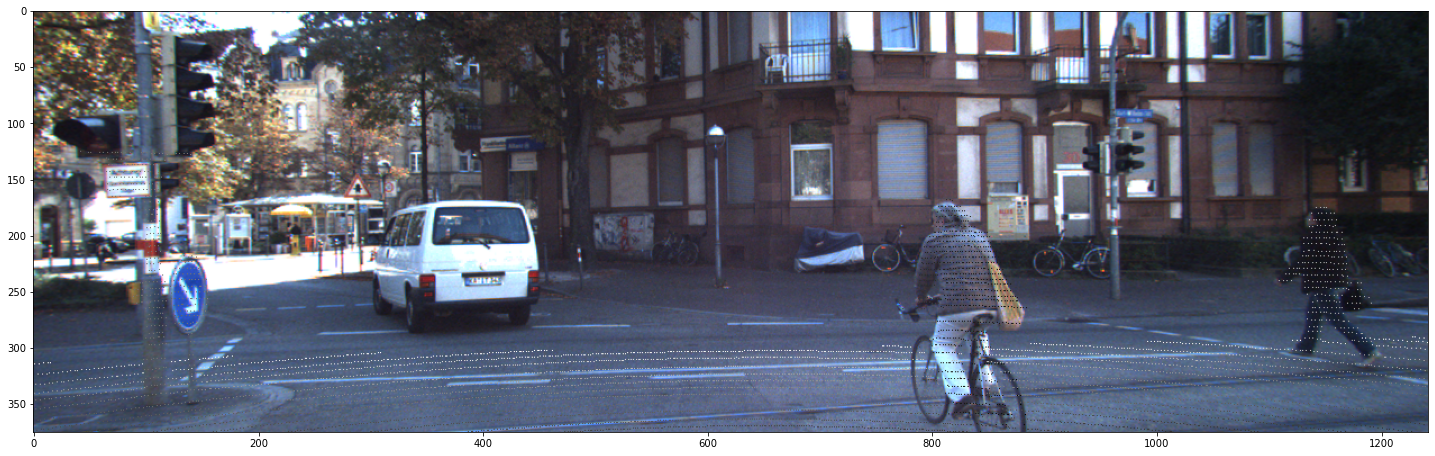

In [25]:
velo, cam2, cam3, oxts = kitti[0] 

cam2_ = np.asarray(cam2).copy()
x, y, z, i, coo, idx = kitti.veloTocam2(velo)

x = x[z < 10]
y = y[z < 10]
z = z[z < 10]
z = ( z- z.min())/( z.max()-  z.min()) * 255
cam2_[y, x] = np.array([z, z, z]).T

fig, ax = plt.subplots(figsize=(25, 25))
ax.imshow(cam2_)

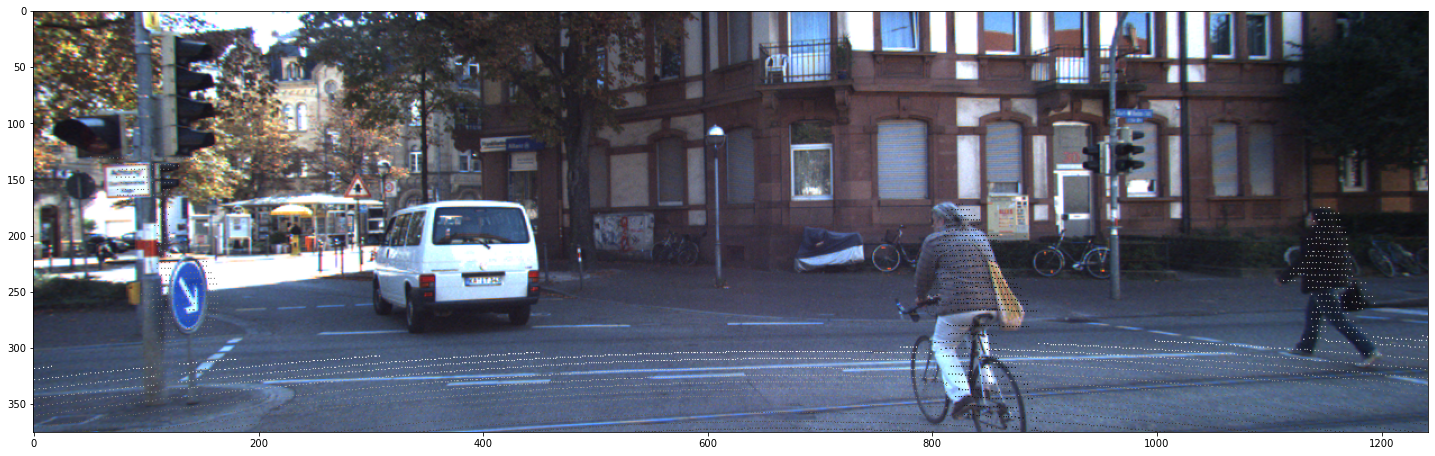

In [26]:
estimated_RT = history[1][1]

cam2_ = np.asarray(cam2).copy()
x, y, z, i, coo, idx = kitti.veloToX(velo, T_cam_velo=estimated_RT, P_rect=kitti.calib.P_rect_20)

x = x[z < 10]
y = y[z < 10]
z = z[z < 10]
z = ( z- z.min())/( z.max()-  z.min()) * 255
cam2_[y, x] = np.array([z, z, z]).T

fig, ax = plt.subplots(figsize=(25, 25))
ax.imshow(cam2_)

In [4]:
from PyKitti2Dataset import *
from PyKittiPatches import *

kittipatches = PyKittiPatches(basedir)
kittipatches

PyKittiPatches(base_path=/home/ios/data3/kitti/tracking/training, train=True, val_split=0.9, sequences=['0000'])[1380]

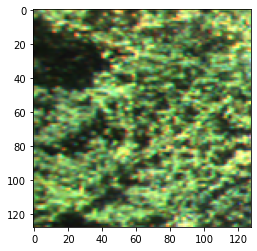

In [8]:
plt.imshow(kittipatches[4][1])

In [12]:
kittipatches.build_dataset(start=("0000", 0))

files 154
0000 0 21
0000 3 23
0000 6 21
0000 9 11
0000 12 25
0000 15 9
0000 18 32
0000 21 18
0000 24 29
0000 27 17
0000 30 22


KeyboardInterrupt: 

In [74]:
!rm -rf {basedir} + "/patches"

In [83]:
!ls /home/ios/data3/kitti/tracking/training/calib

0000.txt  0003.txt  0006.txt  0009.txt	0012.txt  0015.txt  0018.txt
0001.txt  0004.txt  0007.txt  0010.txt	0013.txt  0016.txt  0019.txt
0002.txt  0005.txt  0008.txt  0011.txt	0014.txt  0017.txt  0020.txt


In [89]:
os.path.join(basedir, 'patches', 'seq')

'/home/ios/data3/kitti/tracking/training/patches/seq'

In [43]:
l = sorted(glob.glob(os.path.join(basedir_testing, 'oxts', '{}.{}'.format("0000", "txt"))))
len(load_oxts_packets_and_poses(l))

465

In [11]:
ds = PyKittiPatches(basedir, train=True, val_split=0.9, sequences=[f"00{i:02d}" for i in range(20)])
kitti = PyKitti2(base_path="/home/ios/data3/kitti/tracking/training", sequence="0000")
ds.get_keypoints(1)

files 154


(array([810, 326]), array([ 6.02428385, -1.54646951, -1.25113657]))

In [9]:
x, y, z, ii, kps_3d_, idx = kitti.veloTocam2(ds.get_keypoints(1)[1][None, :])
pc_xy = np.stack([x, y]).T
pc_xy

array([[812, 326]], dtype=int32)

In [13]:
basedir

'/home/ios/data3/kitti/tracking/training'